In [1]:
#data loading
import pandas as pd
filename="/content/Chile.csv"
a=pd.read_csv(str(filename))

print(a)

      rownames region  population sex   age education   income  statusquo vote
0            1      N      175000   M  65.0         P  35000.0    1.00820    Y
1            2      N      175000   M  29.0        PS   7500.0   -1.29617    N
2            3      N      175000   F  38.0         P  15000.0    1.23072    Y
3            4      N      175000   F  49.0         P  35000.0   -1.03163    N
4            5      N      175000   F  23.0         S  35000.0   -1.10496    N
...        ...    ...         ...  ..   ...       ...      ...        ...  ...
2695      2696      M       15000   M  42.0         P  15000.0   -1.26247    N
2696      2697      M       15000   F  28.0         P  15000.0    1.32950    Y
2697      2698      M       15000   F  44.0         P  75000.0    1.42045    Y
2698      2699      M       15000   M  21.0         S  75000.0    0.18315  NaN
2699      2700      M       15000   M  20.0        PS  35000.0    1.38179    Y

[2700 rows x 9 columns]


In [2]:
##Checking for null values
a.isna().sum()

,0
rownames,0
region,0
population,0
sex,0
age,1
education,11
income,98
statusquo,17
vote,168


In [6]:
a["age"]=a["age"].fillna(a["age"].mean())
a["education"]=a["education"].fillna(a["education"].mode()[0])
a["income"]=a["income"].fillna(a["income"].mean())
a["statusquo"]=a["statusquo"].fillna(a["statusquo"].mean())
a["vote"]=a["vote"].fillna(a["vote"].mode()[0])
print(a)

      rownames region  population sex   age education   income  statusquo vote
0            1      N      175000   M  65.0         P  35000.0    1.00820    Y
1            2      N      175000   M  29.0        PS   7500.0   -1.29617    N
2            3      N      175000   F  38.0         P  15000.0    1.23072    Y
3            4      N      175000   F  49.0         P  35000.0   -1.03163    N
4            5      N      175000   F  23.0         S  35000.0   -1.10496    N
...        ...    ...         ...  ..   ...       ...      ...        ...  ...
2695      2696      M       15000   M  42.0         P  15000.0   -1.26247    N
2696      2697      M       15000   F  28.0         P  15000.0    1.32950    Y
2697      2698      M       15000   F  44.0         P  75000.0    1.42045    Y
2698      2699      M       15000   M  21.0         S  75000.0    0.18315    N
2699      2700      M       15000   M  20.0        PS  35000.0    1.38179    Y

[2700 rows x 9 columns]


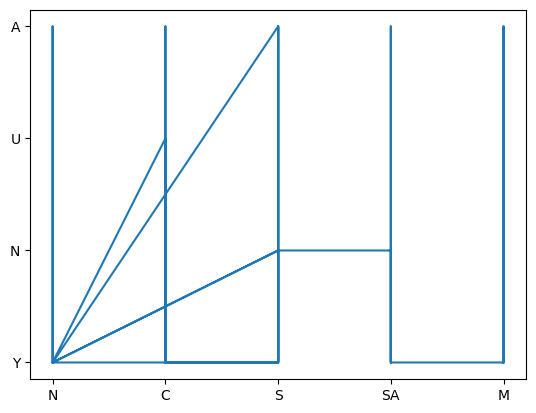

In [8]:
from matplotlib import pyplot as plt
target="vote"
index=1
plt.plot(a[a.columns[index]],a[str(target)])

<BarContainer object of 2700 artists>

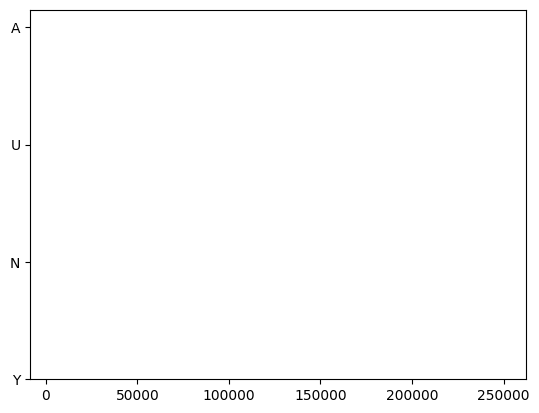

In [9]:
plt.bar(a[a.columns[2]],a[str(target)])

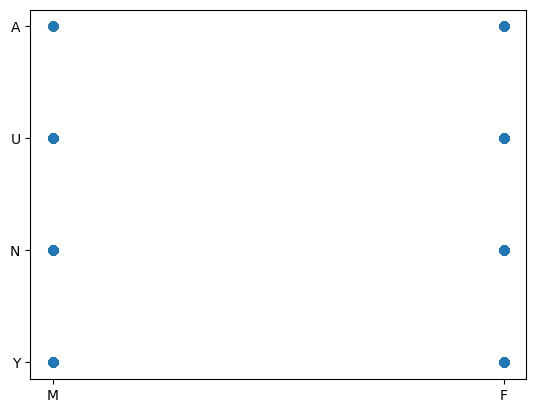

In [10]:
plt.scatter(a[a.columns[3]], a[str(target)])

In [12]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
b=LabelEncoder()


#transform string into int
transformColumns={1,3,5,8}
for x in transformColumns:
    a[a.columns[x]]=b.fit_transform(a[a.columns[x]])

print(a)

      rownames  region  population  sex  age  education  income  statusquo  \
0            1       2           8    1   48          0       4       1631   
1            2       2           8    1   11          1       1         18   
2            3       2           8    0   20          0       2       1784   
3            4       2           8    0   32          0       4        271   
4            5       2           8    0    5          2       4        173   
...        ...     ...         ...  ...  ...        ...     ...        ...   
2695      2696       1           2    1   25          0       2         34   
2696      2697       1           2    0   10          0       2       1880   
2697      2698       1           2    0   27          0       5       1974   
2698      2699       1           2    1    3          2       5       1101   
2699      2700       1           2    1    2          1       4       1934   

      vote  
0        3  
1        1  
2        3  
3        1 

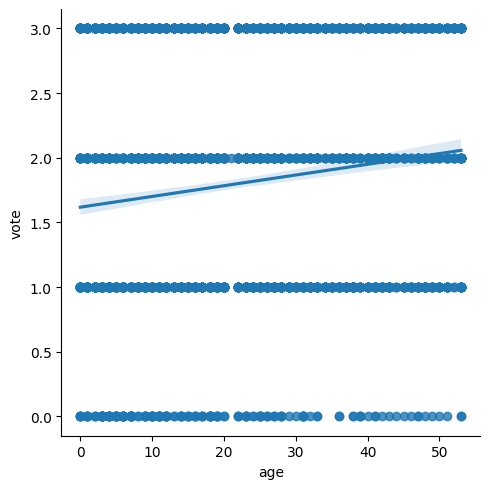

In [13]:
import seaborn as sns
#a["family"] = pd.to_numeric(a["family"])
#a["parttime"] = pd.to_numeric(a["parttime"])
sns.lmplot(x="age",y=str(target),data=a)

<Axes: xlabel='education', ylabel='vote'>

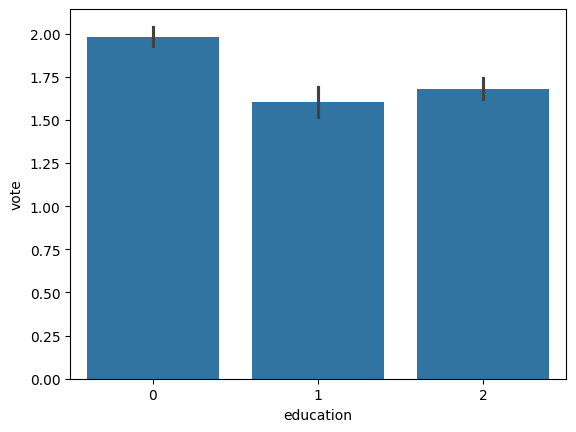

In [14]:
sns.barplot(x=a.columns[5],y=str(target),data=a)

<Axes: xlabel='region', ylabel='vote'>

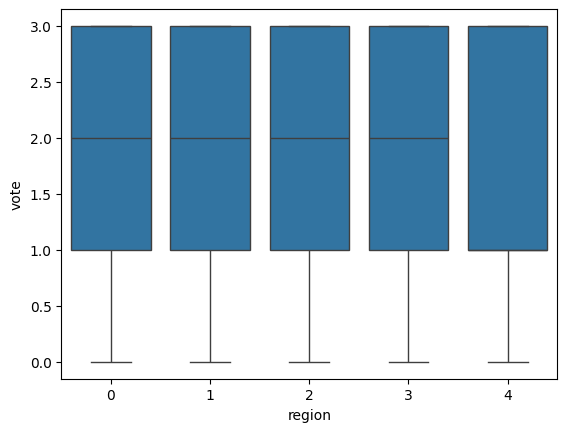

In [15]:
sns.boxplot(x=a.columns[1],y=str(target),data=a)

<ipython-input-16-61a72522baee>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a[str(target)])


<Axes: xlabel='vote', ylabel='Density'>

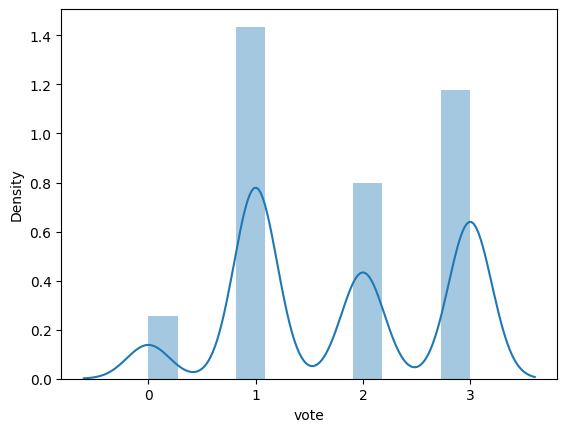

In [16]:
sns.distplot(a[str(target)])

<Axes: xlabel='region', ylabel='Density'>

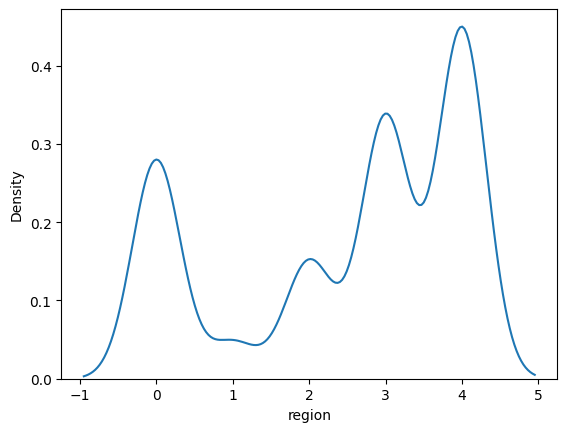

In [17]:
sns.kdeplot(a[a.columns[1]])

<Axes: xlabel='age', ylabel='count'>

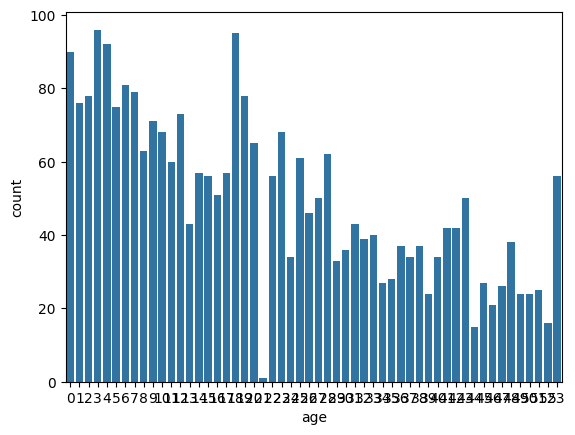

In [18]:
sns.countplot(x=a.columns[4],data=a)

<Axes: >

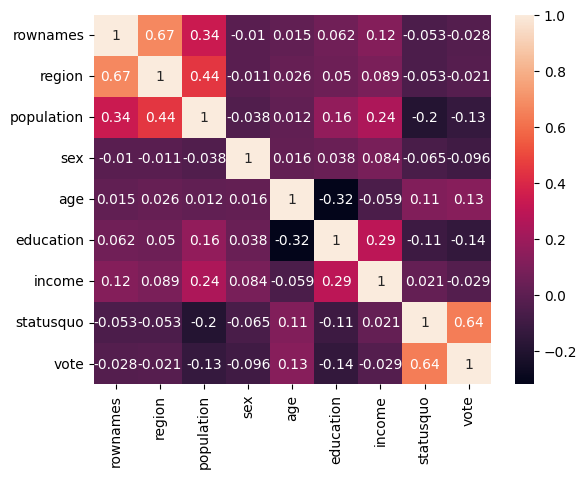

In [19]:
data=a.select_dtypes(include=np.number).corr()
sns.heatmap(data, annot=True)

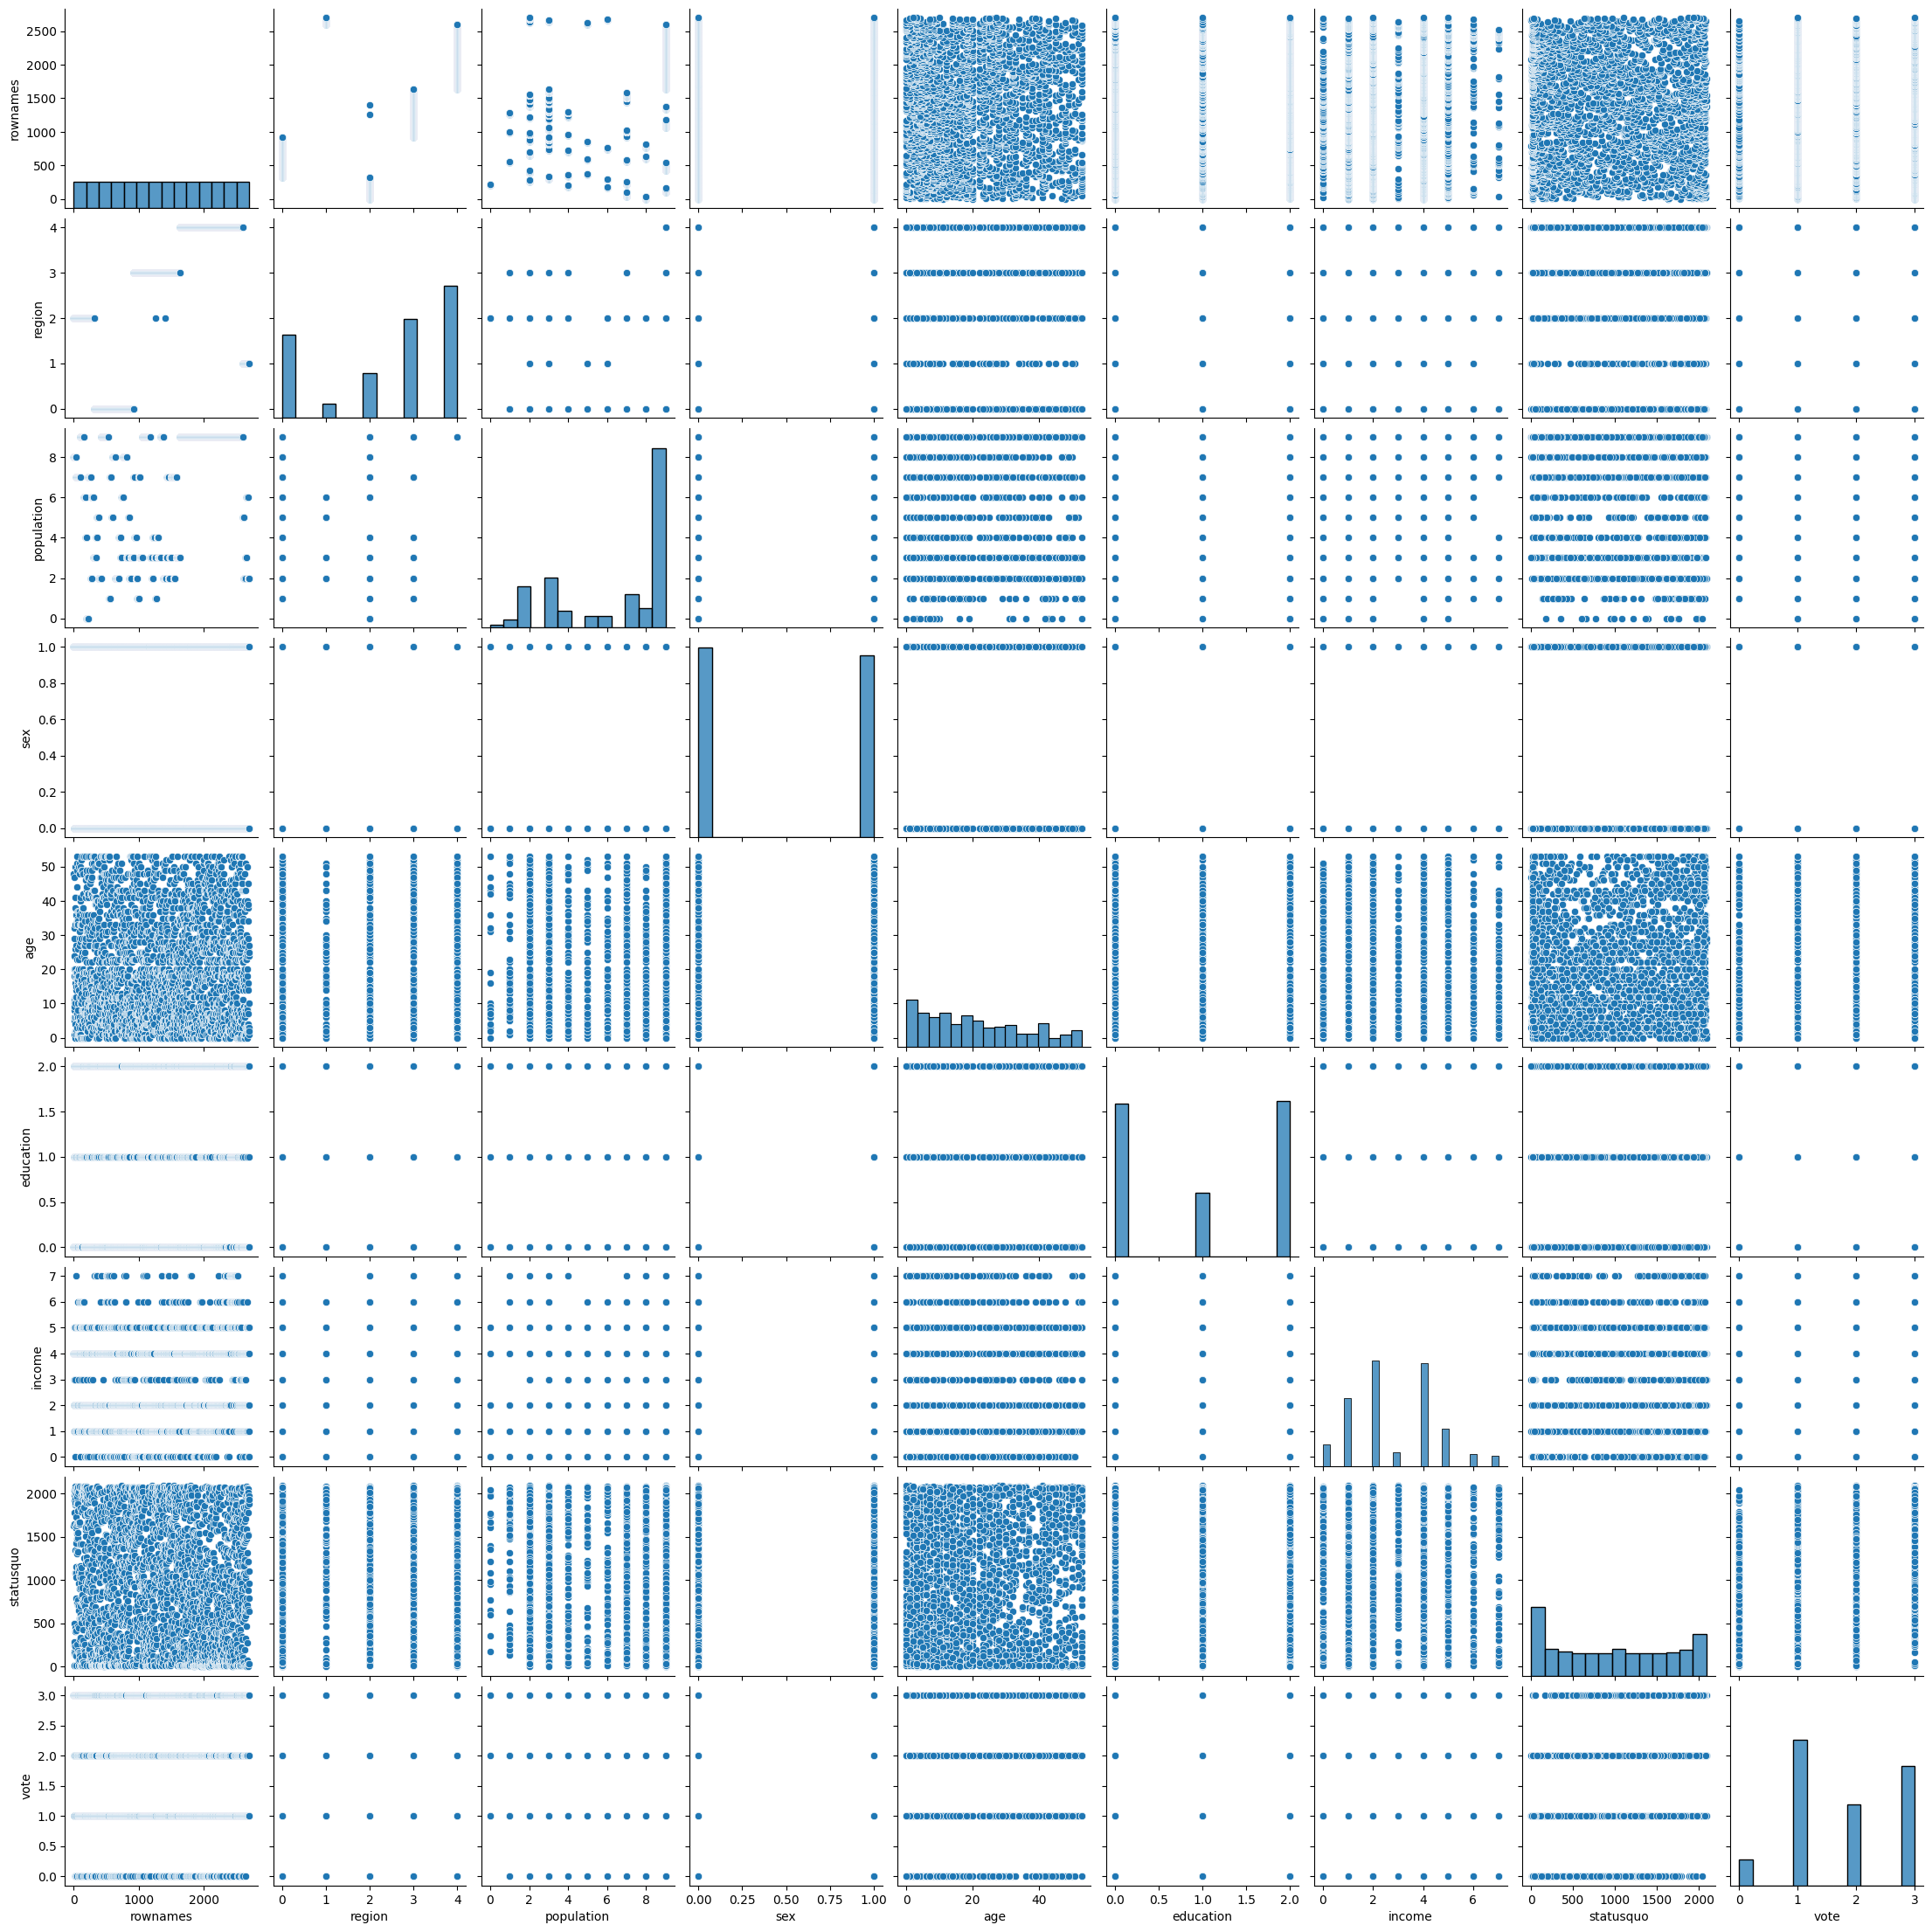

In [20]:
sns.pairplot(data=a)

In [21]:
#data split

y=a[str(target)]
x=a.iloc[:,a.columns != str(target)]


print(x)

      rownames  region  population  sex  age  education  income  statusquo
0            1       2           8    1   48          0       4       1631
1            2       2           8    1   11          1       1         18
2            3       2           8    0   20          0       2       1784
3            4       2           8    0   32          0       4        271
4            5       2           8    0    5          2       4        173
...        ...     ...         ...  ...  ...        ...     ...        ...
2695      2696       1           2    1   25          0       2         34
2696      2697       1           2    0   10          0       2       1880
2697      2698       1           2    0   27          0       5       1974
2698      2699       1           2    1    3          2       5       1101
2699      2700       1           2    1    2          1       4       1934

[2700 rows x 8 columns]


In [22]:
print(y)

0       3
1       1
2       3
3       1
4       1
       ..
2695    1
2696    3
2697    3
2698    1
2699    3
Name: vote, Length: 2700, dtype: int64


In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [24]:
print(x_train)

      rownames  region  population  sex  age  education  income  statusquo
2307      2308       4           9    1    6          0       2         18
1270      1271       3           1    1    8          2       1       1828
943        944       3           4    0   37          0       5       1133
1428      1429       3           3    1   12          2       0       1621
972        973       3           2    0   12          2       4       1142
...        ...     ...         ...  ...  ...        ...     ...        ...
2463      2464       4           9    0    3          1       4         18
2501      2502       4           9    1    7          1       6       1874
253        254       2           7    1   15          2       4       1044
2308      2309       4           9    0   41          0       2        890
208        209       2           0    0   36          2       2       1359

[2160 rows x 8 columns]


In [25]:
print(y_train)

2307    1
1270    3
943     2
1428    3
972     2
       ..
2463    1
2501    3
253     0
2308    3
208     3
Name: vote, Length: 2160, dtype: int64


In [26]:
print(x_test)

      rownames  region  population  sex  age  education  income  statusquo
18          19       2           8    1   50          0       5       1870
643        644       0           2    1   37          2       4       1593
1960      1961       4           9    0   18          1       4        969
509        510       0           9    0    8          1       6        477
1961      1962       4           9    1   32          2       6         38
...        ...     ...         ...  ...  ...        ...     ...        ...
2664      2665       1           6    0    3          2       4       1588
1926      1927       4           9    1   15          2       5         81
1513      1514       3           7    1   16          0       1        455
2376      2377       4           9    0    5          0       2       1269
67          68       2           7    1    1          2       1       1327

[540 rows x 8 columns]


In [27]:
print(y_test)

18      3
643     3
1960    2
509     1
1961    1
       ..
2664    3
1926    0
1513    1
2376    3
67      1
Name: vote, Length: 540, dtype: int64


In [28]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train,y_train)
ypred=model.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
print(ypred)

[3 3 1 1 1 3 3 3 1 1 3 1 1 3 3 3 3 1 1 3 1 1 1 1 3 1 1 1 3 1 1 1 1 3 1 3 1
 3 1 1 1 3 2 3 3 1 1 3 3 1 3 3 3 3 3 1 1 1 1 1 3 1 3 3 1 1 3 3 3 1 1 3 2 1
 2 3 1 1 3 3 1 3 3 3 1 1 3 1 2 1 1 1 1 1 1 1 3 1 1 3 3 1 1 1 3 3 1 3 1 1 1
 1 1 1 1 1 1 1 1 3 1 3 1 3 1 3 3 1 3 1 3 1 3 3 3 2 3 3 1 1 1 3 1 1 3 1 3 3
 3 1 3 3 1 1 1 3 3 3 3 1 1 3 3 2 1 3 1 1 1 3 1 3 1 1 1 1 3 1 1 3 1 3 3 1 1
 1 1 1 3 1 3 1 3 3 1 3 1 3 3 3 1 3 1 3 1 1 1 1 1 1 3 3 1 1 3 3 3 1 1 3 1 3
 1 3 1 1 1 2 1 1 1 1 3 1 3 1 1 3 3 1 3 3 1 3 3 1 1 3 1 3 3 1 1 3 2 1 2 1 1
 3 1 3 3 1 3 1 3 3 3 1 3 3 3 1 1 3 1 3 3 1 3 1 1 1 1 3 1 1 3 1 3 2 1 3 3 3
 1 1 3 3 1 1 3 1 3 3 1 1 1 1 1 3 1 1 1 1 3 2 1 3 1 1 1 1 3 3 2 3 3 1 1 1 3
 3 1 1 1 3 1 1 3 1 3 3 3 1 2 3 3 3 3 3 3 3 3 1 3 3 3 1 3 3 3 3 3 1 3 1 3 1
 1 3 1 1 1 1 3 1 3 3 3 3 3 3 3 1 3 3 2 3 1 1 3 1 1 3 3 3 3 3 3 1 1 3 1 3 3
 1 1 3 3 1 3 3 3 3 1 3 1 1 3 1 3 1 2 1 3 2 1 1 3 1 3 2 1 3 3 3 3 3 3 1 3 3
 3 3 3 1 1 3 1 3 1 1 3 3 1 3 3 1 1 3 1 3 3 1 3 1 3 3 3 3 3 1 1 3 3 3 3 3 1
 1 1 1 1 1 3 3 3 3 1 1 3 

In [30]:
#Print accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

0.6240740740740741


In [31]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[  0  20   0  18]
 [  0 172   9  24]
 [  0  55   9  56]
 [  0  18   3 156]]


In [33]:
print(model.predict([[19,2,8,1,50,0,5,1870]]))

[3]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [34]:
from sklearn.tree import DecisionTreeClassifier
b=DecisionTreeClassifier()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [35]:
print(ypred)

[3 0 2 0 1 3 3 3 1 1 2 1 0 2 3 3 2 1 1 2 1 1 1 1 3 1 1 2 0 1 1 2 1 2 1 3 3
 3 3 2 1 2 2 3 3 0 0 0 2 1 3 0 2 2 3 1 2 1 0 1 3 2 3 3 0 2 3 3 3 1 1 2 3 1
 1 3 1 1 3 2 1 3 3 2 1 1 3 1 0 2 1 1 2 1 2 1 3 1 1 3 2 1 2 3 2 3 1 3 1 0 3
 2 1 1 1 1 3 1 1 3 2 3 1 2 2 3 3 1 3 2 1 2 3 2 0 1 0 2 1 1 2 0 0 0 3 1 2 3
 3 1 2 2 1 1 2 3 3 3 2 2 0 3 3 3 3 3 1 0 2 2 1 3 2 0 1 3 3 2 1 3 1 3 2 1 1
 0 2 1 3 3 2 1 0 3 2 3 1 2 1 2 1 3 1 3 1 2 1 3 1 1 3 3 1 3 1 3 2 1 1 3 3 3
 1 3 2 1 1 3 2 2 1 1 2 1 3 1 3 3 3 1 1 3 1 3 0 1 1 3 1 2 2 1 1 3 1 1 2 1 1
 2 1 3 3 2 3 1 2 1 3 2 3 3 1 2 2 3 0 2 3 1 3 1 1 1 0 3 2 0 1 1 2 1 1 2 3 3
 2 1 1 2 2 1 3 1 3 3 0 1 1 1 1 3 1 3 2 1 1 2 1 2 0 1 2 1 3 3 1 3 2 2 1 1 3
 2 1 2 3 3 1 1 3 1 3 2 3 1 0 2 2 3 3 3 1 1 1 0 3 1 3 1 1 2 3 2 2 1 3 1 2 1
 1 3 1 1 1 1 2 1 3 1 3 3 3 3 2 1 3 3 3 3 2 1 1 2 2 3 2 2 3 2 3 0 1 3 3 3 3
 1 1 3 3 1 1 3 3 2 1 0 1 3 1 1 3 2 1 1 2 1 2 1 3 1 3 1 1 3 3 0 3 3 1 1 3 2
 3 1 3 1 3 3 1 2 1 2 3 3 1 2 1 0 0 3 1 0 3 2 3 1 2 1 3 2 1 2 1 3 0 3 3 2 1
 1 0 2 2 1 3 3 2 2 2 1 2 

In [36]:
#Print accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

0.5018518518518519


In [37]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[  2  16  12   8]
 [ 19 130  39  17]
 [ 14  34  34  38]
 [  7  19  46 105]]


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.05      0.05      0.05        38
           1       0.65      0.63      0.64       205
           2       0.26      0.28      0.27       120
           3       0.62      0.59      0.61       177

    accuracy                           0.50       540
   macro avg       0.40      0.39      0.39       540
weighted avg       0.51      0.50      0.51       540



In [40]:
print(model.predict([[19,2,8,1,50,0,5,1870]]))

[3]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [41]:
from sklearn.ensemble import RandomForestClassifier
b=RandomForestClassifier()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [42]:
print(ypred)

[3 3 2 1 1 3 3 3 1 1 3 1 1 3 3 3 3 1 1 1 1 1 1 2 3 1 1 2 2 1 1 1 1 1 1 3 1
 3 1 1 1 2 2 3 3 1 1 3 3 1 3 0 3 2 3 1 1 1 1 1 3 1 3 3 2 2 2 3 2 1 1 3 1 1
 1 3 1 1 3 3 1 3 3 3 1 1 3 1 2 2 1 1 1 1 2 1 3 1 1 3 2 1 1 1 3 2 1 3 1 2 3
 1 2 1 1 1 3 1 1 3 1 3 1 3 1 3 2 1 3 1 1 2 2 1 2 1 3 3 1 1 1 2 0 2 3 1 3 3
 3 2 2 3 1 1 1 3 3 3 3 1 1 3 3 2 1 3 1 1 1 3 1 3 2 0 1 1 3 2 1 3 1 3 2 1 1
 2 2 1 3 2 1 1 3 3 2 3 1 2 3 2 1 3 1 3 1 3 1 3 2 1 3 3 1 3 3 2 1 1 1 3 1 3
 1 3 1 1 1 2 1 2 1 1 2 1 3 1 3 3 3 1 2 3 1 3 3 1 1 3 1 2 3 1 2 3 1 1 1 1 1
 2 1 3 3 1 3 1 3 3 3 1 3 3 1 1 2 3 2 2 2 1 3 1 1 1 1 3 1 1 3 1 3 1 2 3 3 3
 1 3 2 2 1 2 3 1 3 3 1 1 1 1 1 2 1 2 1 1 2 1 2 3 1 1 2 1 3 3 1 3 3 1 1 1 3
 3 1 1 2 3 1 1 3 1 3 3 3 1 1 3 3 3 3 3 3 2 3 1 3 1 3 1 3 2 3 2 3 1 3 1 2 1
 1 3 1 1 1 2 3 1 3 1 3 3 3 3 2 1 3 3 3 2 2 1 3 1 3 3 2 2 3 3 3 1 1 3 1 2 3
 1 1 3 3 1 3 3 3 3 1 2 1 3 3 1 3 1 3 1 3 1 1 1 3 1 3 2 3 3 3 2 3 3 3 1 3 2
 3 3 1 1 2 3 1 3 1 1 3 3 1 3 3 1 1 3 1 3 1 2 2 1 3 1 3 2 3 2 1 3 1 3 3 3 1
 1 2 3 1 2 3 3 3 3 1 1 2 

In [43]:
#Print accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

0.6314814814814815


In [44]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[  0  17   8  13]
 [  2 165  24  14]
 [  1  40  36  43]
 [  0  15  22 140]]


In [45]:
print(model.predict([[19,2,8,1,50,0,5,1870]]))

[3]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.70      0.80      0.75       205
           2       0.40      0.30      0.34       120
           3       0.67      0.79      0.72       177

    accuracy                           0.63       540
   macro avg       0.44      0.47      0.45       540
weighted avg       0.57      0.63      0.60       540

